# Polinomial Models

In [ ]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


In [ ]:
# Sample dataset
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [50,65,75,80,85,88,89,88,85,80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

In [ ]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']]
y = df['Exam_Score']

# Display the first few rows of the DataFrame
df.head()

,Study_Hours,Exam_Score
0,1,50
1,2,65
2,3,75
3,4,80
4,5,85


In [ ]:
# Fit linear regression for comparison
linear_model = LinearRegression()
linear_model.fit(X, y)



# Fit polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)



LinearRegression()

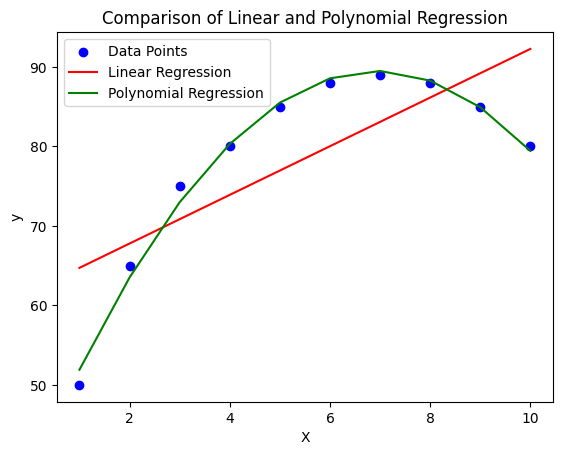

Linear Regression R^2: 0.5573768700346413
Polynomial Regression R^2: 0.9918915079391099
Linear Regression MSE: 61.369696969696975, RMSE: 7.833881347690745
Polynomial Regression MSE: 1.124242424242421, RMSE: 1.0603029870006124


In [ ]:
# Plot results
plt.scatter(X, y, color='blue', label='Data Points')

# Evaluate the models
y_pred = linear_model.predict(X)
plt.plot(X, y_pred, color='red', label='Linear Regression')

y_poly_pred = poly_model.predict(X_poly)
plt.plot(X, y_poly_pred, color='green', label='Polynomial Regression')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Linear and Polynomial Regression')
plt.legend()
plt.show()

# evaluate the models metrics(efficiency, error, etc.)
print(f'Linear Regression R^2: {r2_score(y, y_pred)}')
print(f'Polynomial Regression R^2: {r2_score(y, y_poly_pred)}')

#mse and rmse
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(y, y_pred)
mse_poly = mean_squared_error(y, y_poly_pred)
rmse_linear = np.sqrt(mse_linear)
rmse_poly = np.sqrt(mse_poly)
print(f'Linear Regression MSE: {mse_linear}, RMSE: {rmse_linear}')
print(f'Polynomial Regression MSE: {mse_poly}, RMSE: {rmse_poly}')


# Exponential regression

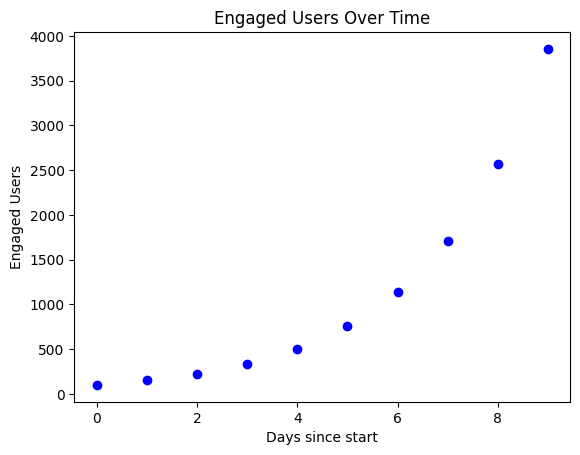

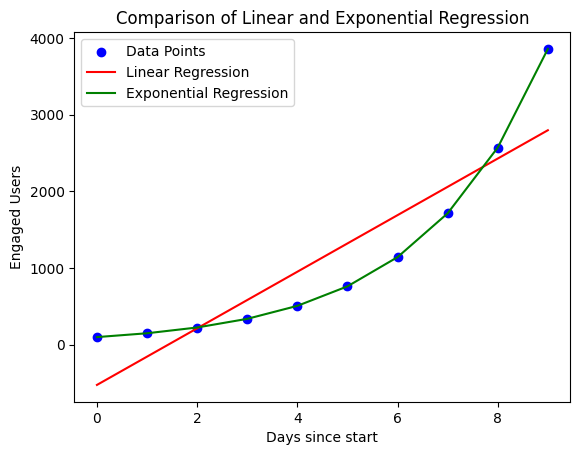

Linear Regression R^2: 0.811021837748588
Exponential Regression R^2: 0.999999993165805
Linear Regression MSE: 261371.25333333333, RMSE: 511.2448076345943
Exponential Regression MSE: 0.009452214452216678, RMSE: 0.09722249972211514


In [ ]:
# Import libraries


# Sample dataset
from sklearn.pipeline import make_pipeline


data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100, 150, 225, 338, 507, 761, 1142, 1713, 2570, 3855]
}
# Create a DataFrame from the dataset
df = pd.DataFrame(data)


# Extract the features (Date) and target (Engaged_Users)
X = np.array((df['Date'] - df['Date'].min()).dt.days).reshape(-1, 1)
y = df['Engaged_Users'].values

# Visualize the data
plt.scatter(X, y, color='blue')
plt.xlabel('Days since start')
plt.ylabel('Engaged Users')
plt.title('Engaged Users Over Time')
plt.show()

# Fit linear regression for comparison
linear_model = LinearRegression()
linear_model.fit(X, y)


# Fit exponential regression
X_exp = np.array((df['Date'] - df['Date'].min()).dt.days).reshape(-1, 1)
y_exp = df['Engaged_Users'].values
exp_model = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
exp_model.fit(X_exp, y_exp)

# Evaluate the models and plot results
y_pred = linear_model.predict(X)
y_exp_pred = exp_model.predict(X_exp)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.plot(X, y_exp_pred, color='green', label='Exponential Regression')
plt.xlabel('Days since start')
plt.ylabel('Engaged Users')
plt.title('Comparison of Linear and Exponential Regression')
plt.legend()
plt.show()
# evaluate the models metrics(efficiency, error, etc.)
from sklearn.metrics import r2_score
print(f'Linear Regression R^2: {r2_score(y, y_pred)}')
print(f'Exponential Regression R^2: {r2_score(y, y_exp_pred)}')
#mse and rmse
mse_linear = mean_squared_error(y, y_pred)
mse_exp = mean_squared_error(y, y_exp_pred)
rmse_linear = np.sqrt(mse_linear)
rmse_exp = np.sqrt(mse_exp)
print(f'Linear Regression MSE: {mse_linear}, RMSE: {rmse_linear}')
print(f'Exponential Regression MSE: {mse_exp}, RMSE: {rmse_exp}')


# Power models

Modelo de Potencia: y = 0.166 * x^1.984


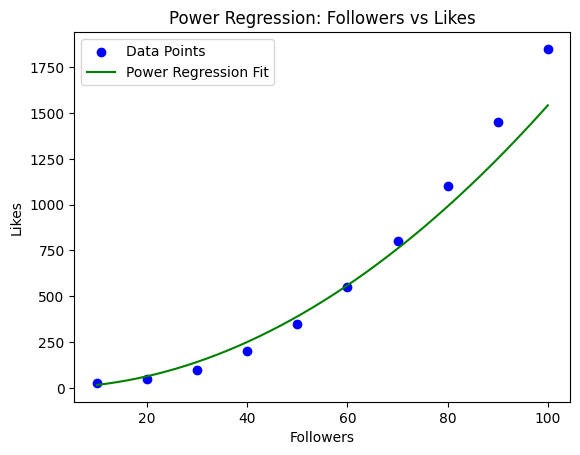

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
}
df = pd.DataFrame(data)

X = df['Followers'].values
y = df['Likes'].values

# Transformación log-log
logX = np.log(X).reshape(-1,1)
logy = np.log(y)

model = LinearRegression()
model.fit(logX, logy)

# Recuperar parámetros de la función de potencia
b = model.coef_[0]
a = np.exp(model.intercept_)

print(f"Modelo de Potencia: y = {a:.3f} * x^{b:.3f}")

# Predicción sobre rango suave
X_fit = np.linspace(X.min(), X.max(), 1000)
y_fit = a * (X_fit**b)

# Gráfico
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_fit, y_fit, color='green', label='Power Regression Fit')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Power Regression: Followers vs Likes')
plt.legend()
plt.show()


